In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'

house_prices = pd.read_csv(url,sep=",")
house_prices = house_prices.drop(house_prices.columns[0], axis=1)
house_prices.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [24]:
#Checking for Null Values

house_prices.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [31]:
#EDA

print(house_prices.describe())

               Sqft       Floor    TotalFloor       Bedroom   Living.Room  \
count  6.450000e+02  645.000000  6.450000e+02  6.450000e+02  6.450000e+02   
mean   1.101617e-17    5.939535 -2.754042e-17  5.370381e-17  4.957275e-17   
std    1.000776e+00    3.884721  1.000776e+00  1.000776e+00  1.000776e+00   
min   -1.523619e+00    1.000000 -1.974190e+00 -1.819099e+00 -3.926263e+00   
25%   -7.858412e-01    3.000000 -7.723470e-01 -8.289563e-01  4.026936e-01   
50%   -1.362251e-01    5.000000  2.291886e-01  1.611860e-01  4.026936e-01   
75%    4.762700e-01    8.000000  6.298029e-01  1.151328e+00  4.026936e-01   
max    5.645358e+00   22.000000  5.437174e+00  4.121755e+00  4.731650e+00   

           Bathroom          Price  
count  6.450000e+02     645.000000  
mean   2.754042e-18   61986.823256  
std    1.000776e+00   35635.091007  
min   -2.651152e+00    6100.000000  
25%   -1.187117e+00   39000.000000  
50%    2.769182e-01   50000.000000  
75%    2.769182e-01   75000.000000  
max    4.6

In [32]:
# Performing standard scaling to pre-process

scaler = StandardScaler()
house_prices[['Sqft','TotalFloor','Bedroom','Living.Room','Bathroom']] = scaler.fit_transform(house_prices[['Sqft','TotalFloor','Bedroom','Living.Room','Bathroom']])
house_prices.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,-0.456393,2,-0.772347,-0.828956,0.402694,0.276918,62000
1,0.791798,5,-0.772347,1.151328,0.402694,0.276918,78000
2,-0.507434,5,-0.772347,-0.828956,0.402694,-1.187117,58000
3,-0.089824,2,-0.772347,0.161186,0.402694,0.276918,45000
4,-0.730160,11,0.629803,0.161186,0.402694,0.276918,45000


In [39]:
# Identifying optimal number of cluster
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,15)

#Make a seperate array file having data for required coloumns

array1 = house_prices ['Sqft'].to_numpy()
array2 = house_prices ['Bedroom'].to_numpy()
array = np.array(list(zip(array1,array2))).reshape(len(array1),2)

# For Loop

for k in K:
    KMeansmodel = KMeans (n_clusters=k)
    KMeansmodel.fit(array)
    distortions.append(sum(np.min(cdist(array,KMeansmodel.cluster_centers_,'euclidean'),axis = 1 ))/array.shape[0])
    inertias.append(KMeansmodel.inertia_)
    mapping1[K] = sum(np.min(cdist(array,KMeansmodel.cluster_centers_,'euclidean'),axis = 1)/array.shape[0])
    mapping2[K] = KMeansmodel.inertia_
       

range(1, 15) : 0.2094293934497323


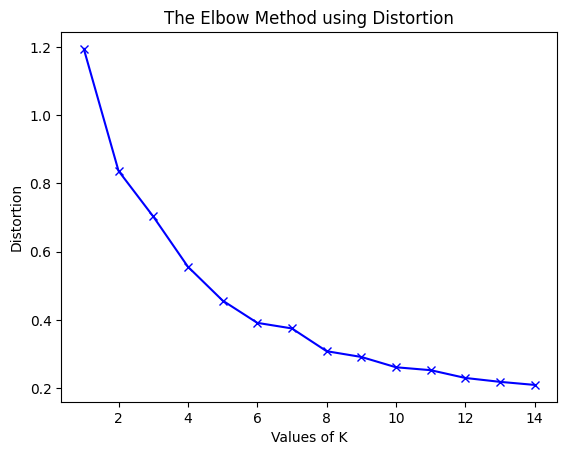

In [40]:
#Using Distorition -

for key,val in mapping1.items():
    print(str(key) +' : ' + str(val))

# Plot 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

range(1, 15) : 52.776864763286476


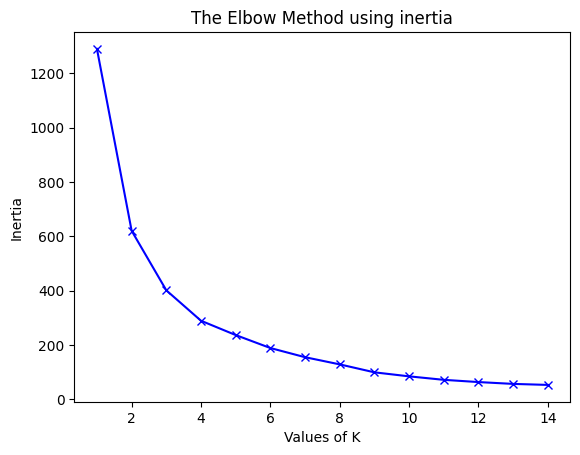

In [41]:
#Using Inertia -

for key,val in mapping2.items():
    print(str(key) +' : ' + str(val))

# Plot 
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using inertia')
plt.show()

In [58]:
# Finding centroids in ideal model
data = pd.DataFrame(array,columns= ('Sqft','Bedroom'))

kmeans = KMeans(n_clusters=4).fit(data)

centroids = kmeans.cluster_centers_
print('Centroids : \n',centroids)

Centroids : 
 [[-4.35507159e-02  1.35983651e-03]
 [ 2.33661217e+00  7.66272911e-01]
 [ 4.03748988e-01  1.19722888e+00]
 [-9.46673510e-01 -1.19626719e+00]]


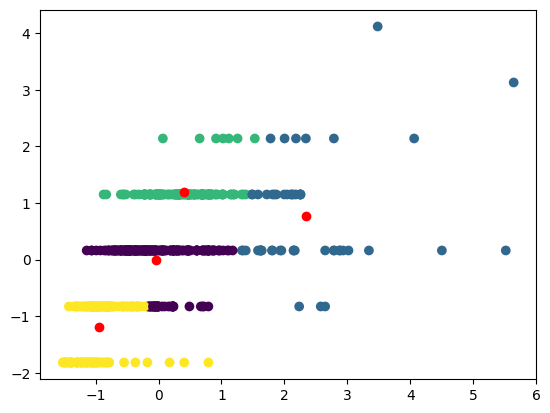

In [59]:
#Plot

plt.scatter(data['Sqft'], data ['Bedroom'], c =  kmeans.labels_.astype(float))
plt.scatter(centroids[:,0], centroids[:,1], c = 'red')
plt.show()